In [533]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [534]:
torch.__version__

'0.4.0'

In [535]:
input_size = 1
output_size = 1
num_epochs = 10
learning_rate = 0.01

In [536]:
def lin(a, x):
    return np.double(a*x)

In [537]:
def generate_fake_data(a, n):
    x_train = np.double(np.random.uniform(1.0, 10.0, n))
    y = np.double(lin(a,x) + np.random.normal(0.0, 2.0,size=n))
    return np.array(x), np.array(y)

In [538]:
x_train = np.array([[1.0], [4.4], [5.5], [6.70], [1.0], [5.60], 
                    [9.779], [6.182], [7.59], [2.167], [10.23], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[2.0], [7.9], [10.10], [12.40], [2.0], [10.10], 
                    [18.24], [12.356], [16.02], [4.32], [20.21], 
                    [20.50], [10.63], [16.02], [6.2]], dtype=np.float32)

#x_train = np.array([[1.0]], dtype=np.float32)

#y_train = np.array([[2.0]], dtype=np.float32)

In [524]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [525]:
model = LinearRegression(input_size, output_size)

In [526]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [530]:
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch[%d/%d], loss: %2.6f'%(epoch+1,num_epochs,loss.data[0]))
        for j in model.parameters():
            print(j.grad.data)
            print(j)

Epoch[5/100], loss: 0.341464
tensor(1.00000e-02 *
       [[ 1.9866]])
Parameter containing:
tensor([[ 1.9808]])
tensor([-0.1464])
Parameter containing:
tensor([-0.3414])
Epoch[10/100], loss: 0.340393
tensor(1.00000e-02 *
       [[ 1.9448]])
Parameter containing:
tensor([[ 1.9799]])
tensor([-0.1433])
Parameter containing:
tensor([-0.3342])
Epoch[15/100], loss: 0.339366
tensor(1.00000e-02 *
       [[ 1.9037]])
Parameter containing:
tensor([[ 1.9789]])
tensor([-0.1403])
Parameter containing:
tensor([-0.3271])
Epoch[20/100], loss: 0.338383
tensor(1.00000e-02 *
       [[ 1.8647]])
Parameter containing:
tensor([[ 1.9780]])
tensor([-0.1374])
Parameter containing:
tensor([-0.3202])
Epoch[25/100], loss: 0.337439
tensor(1.00000e-02 *
       [[ 1.8252]])
Parameter containing:
tensor([[ 1.9770]])
tensor([-0.1346])
Parameter containing:
tensor([-0.3134])
Epoch[30/100], loss: 0.336534
tensor(1.00000e-02 *
       [[ 1.7878]])
Parameter containing:
tensor([[ 1.9761]])
tensor([-0.1318])
Parameter conta

C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\envs\pytorch0.4.0_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


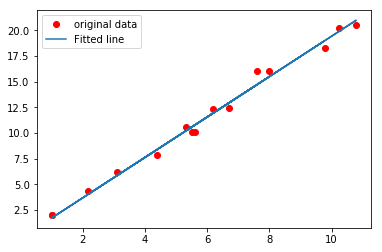

tensor([ 1.7383])


In [532]:
plt.plot(x_train, y_train, 'ro', label = 'original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend()
plt.show()
m = torch.Tensor([1])
predicted_val = model(m)
print(predicted_val)